In [1]:
!pip install seaborn pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 7.1 MB/s eta 0:00:006.7 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.4 MB/s eta 0:00:00 MB/s eta 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 10.8 MB/s eta 0:00:0031m11.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8/8 [seaborn]━━━ 7/8 [seaborn]ib]


In [3]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
iris = sns.load_dataset('iris')

In [5]:
# Statistical summary of numeric features
print(iris.describe())

# Information about the dataset: column types and null values
print(iris.info())


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
Non

In [7]:
iris.shape

(150, 5)

In [10]:
# Automatically Detecting Feature Types
for col in iris.columns:
    if iris[col].dtype == 'object':
        print(f"{col}: nominal, categorical")
    else:
        print(f"{col}: numeric, continuous")

sepal_length: numeric, continuous
sepal_width: numeric, continuous
petal_length: numeric, continuous
petal_width: numeric, continuous
species: nominal, categorical


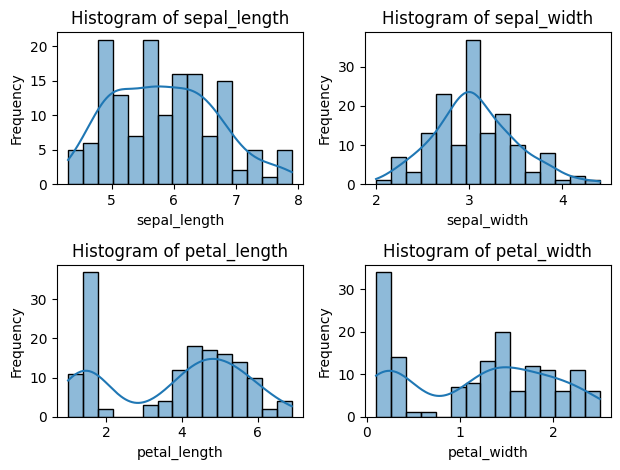

In [11]:
# Create histograms with KDE for each feature
for i, feature in enumerate(iris.columns[:-1], 1):  # Exclude the last column ('species')
    plt.subplot(2, 2, i)
    sns.histplot(iris[feature], kde=True, bins=15)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    
plt.show()

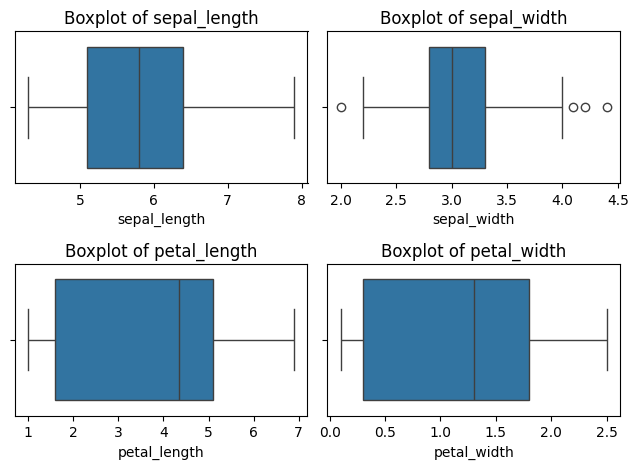

In [12]:
# Create boxplots for each feature (excluding 'species' column)
for i, feature in enumerate(iris.columns[:-1], 1):  # Exclude the 'species' column
    plt.subplot(2, 2, i)  # 2x2 grid of subplots
    sns.boxplot(x=iris[feature])
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

In [17]:
print("\nOutliers in the Iris dataset (if any can be identified fromthe plots):")
print("1. Outliers in Sepal Length: Observed as points outside the whiskers in the boxplot.")
print("2. Outliers in Petal Length: Observed as points outside the whiskers in the boxplot.")


Outliers in the Iris dataset (if any can be identified fromthe plots):
1. Outliers in Sepal Length: Observed as points outside the whiskers in the boxplot.
2. Outliers in Petal Length: Observed as points outside the whiskers in the boxplot.


In [23]:
from scipy.stats import zscore

# Step 2: Identify outliers using Z-scores
numeric_features = iris.select_dtypes(include=['float64'])

# Calculate Z-scores
z_scores = numeric_features.apply(zscore)

# Identify outliers (Z-score > 3 or Z-score < -3)
outliers = (z_scores.abs() > 3).sum()

# Print the outliers count for each feature
print("Number of outliers for each feature:")
print(outliers)

Number of outliers for each feature:
sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
dtype: int64
